# Quantum Simple Harmonic Oscillator

Motion of a quantum simple harmonic oscillator is guided by time independent Schr$\ddot{o}$dinger equation -
$$
\frac{d^2\psi}{dx^2}=\frac{2m}{\hbar^2}(V(x)-E)\psi 
$$

In simple case, we may consider the potential function $V(x)$ to be square well one, which can be described by
$$
E = 
\begin{cases}
\frac{1}{2}kL^2,& -L < x < L\\
\frac{1}{2}kx^2,& \text{otherwise}
\end{cases}
$$
This equation can be solved analytically and the energy eigenvalues are given by
$$
E_n = \left(n + \frac{1}{2}\right)\hbar \omega 
$$
In this section, we shall try to solve the equation numerically by `odeint` function from `SciPy` package. For that we have to express ODE (\ref{eq01}) into two first order ODEs in the following way -
$$
\begin{aligned}
&\frac{d\psi}{dx}=\phi\\
&\frac{d\phi}{dx}= \frac{2m}{\hbar^2}(V(x)-E)\psi
\end{aligned}
$$

Since, it is an initial value problem, we can solve it by `solve_ivp` function `SciPy` package.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import bisect

In [60]:
@np.vectorize
def V(x):
    if np.abs(x) < L:
        return (1/2)*k*x**2
    else:
        return (1/2)*k*L**2
    
def model(x, z):
    psi, phi = z
    dpsi_dx = phi
    dphi_dx = 2*(V(x) - E)*psi
    return np.array([dpsi_dx, dphi_dx])

@np.vectorize
def waveRight(energy):
    global E, x, psi
    E = energy
    x = np.linspace(-b, b, 100)
    x_span = (x[0], x[-1])
    psi0, dpsi_dx0 = 0.1, 0
    x0  = [psi0, dpsi_dx0]
    sol = solve_ivp(model, x_span, x0, t_eval=x)
    x = sol.t
    psi, phi = sol.y
    return psi[-1]

k = 50
m = 1
hcross = 1
b = 2
L = 1
omega = np.sqrt(k/m)
energy = np.linspace(0, 0.5*k*L**2, 100)
psiR = waveRight(energy)

energyEigenVal = []

for i in range(len(psiR)-1):
    if np.sign(psiR[i+1]) == -np.sign(psiR[i]):
        root = bisect(waveRight, energy[i+1], energy[i])
        energyEigenVal.append(root)
        
energyEigenVal

[3.534058814247229, 10.58911567718616, 17.54404389302356, 23.741279112471958]

In [61]:
# Analytic energies
E_analytic = []
Emax = max(energyEigenVal)
n = 0
En = 0
while En < Emax:
    En = (n + 1/2)*hcross*omega
    E_analytic.append(En)
    n += 1
    
E_analytic

[3.5355339059327378, 10.606601717798213, 17.67766952966369, 24.748737341529164]

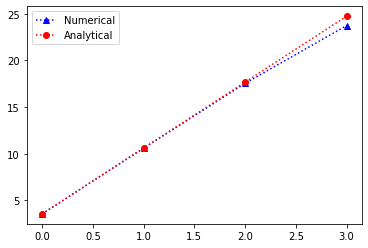

In [62]:
plt.plot(energyEigenVal, ls=':', marker='^', color='blue', label='Numerical')
plt.plot(E_analytic, ls=':', marker='o', color='red', label='Analytical')
plt.legend()
plt.show()

In [63]:
print('------------------------------------')
print('{0:10s}{1:2s}{2:10s}'.format('Energy(Analytic)','','Energy(Numerical)'))
print('------------------------------------')
for i in range(len(energyEigenVal)):
    print('{0:10.3f}{1:5s}{2:10.3f}'.format(E_analytic[i],'', energyEigenVal[i]))
print('------------------------------------')

------------------------------------
Energy(Analytic)  Energy(Numerical)
------------------------------------
     3.536          3.534
    10.607         10.589
    17.678         17.544
    24.749         23.741
------------------------------------


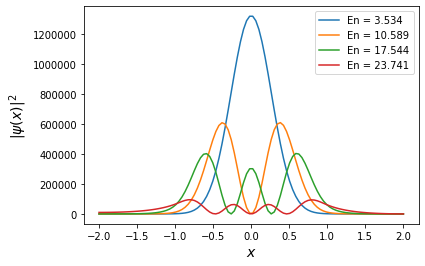

In [64]:

for i in range(len(energyEigenVal)):
    waveRight(energyEigenVal[i])
    plt.plot(x, 100**i*psi**2, label='En = %0.3f'%energyEigenVal[i])
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$|\psi(x)|^2$', fontsize=14)
plt.legend()
plt.show()
    